Imports

In [1]:
import math
import numpy as np
from tensorflow.keras.datasets import mnist, cifar10, fashion_mnist, cifar100
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
from sklearn.decomposition import PCA


# Load MNIST Data

In [ ]:
(training_data,training_labels),(testing_data,testing_labels) = mnist.load_data()

In [ ]:
print(training_data.shape,training_labels.shape,testing_data.shape,testing_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


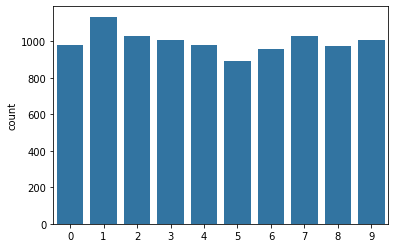

In [ ]:
sns.countplot(testing_labels, color = sns.color_palette()[0])

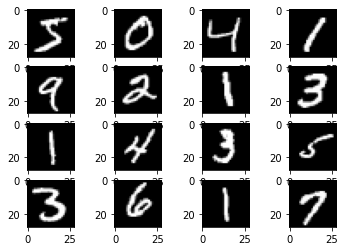

In [ ]:
fig, axs = plt.subplots(4, 4)
for i in range(16):  
    r, c = i//4, i%4
    axs[r,c].imshow(training_data[i], cmap=plt.get_cmap('gray'))
plt.show()

Finding the classes in the dataset

In [ ]:
classes = np.unique(training_labels)
nclasses = len(classes)

print('The', nclasses, 'classes are:', list(classes))

The 10 classes are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# Check min and max
print(np.min(training_data), np.max(training_data))
print(np.min(testing_data), np.max(testing_data))

0 255
0 255


In [ ]:
# Normalize the data
training_data = training_data.astype('float32') /255.0
testing_data = testing_data.astype('float32') / 255.0

## Creating a dataframe from the data

In [ ]:
training_data_flat = training_data.reshape(-1,784)
features = ['pixel'+str(i) for i in range(training_data_flat.shape[1])]
df_mnist = pd.DataFrame(training_data_flat,columns=features)


In [ ]:
df_mnist['label'] = training_labels
print('Size of the dataframe:',df_mnist.shape)

Size of the dataframe: (60000, 785)


In [ ]:
df_mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


## Execute Principal Component Analysis

In [ ]:
pca_mnist = PCA(n_components=2)
comps_mnist = pca_mnist.fit_transform(df_mnist.iloc[:,:-1])

In [ ]:
principal_mnist_Df = pd.DataFrame(data = comps_mnist, columns = ['PC 1', 'PC 2'])
principal_mnist_Df['y'] = training_labels

In [ ]:
principal_mnist_Df.head()

,PC 1,PC 2,y
0,0.485921,-1.226285,5
1,3.967479,-1.156331,0
2,-0.203381,1.537890,4
3,-3.133871,-2.381287,1
4,-1.501035,2.865020,9


In [ ]:
print('Amount of variance explained for each principal component:\n', pca_mnist.explained_variance_ratio_)

Amount of variance explained for each principal component:
 [0.0970472  0.07095952]


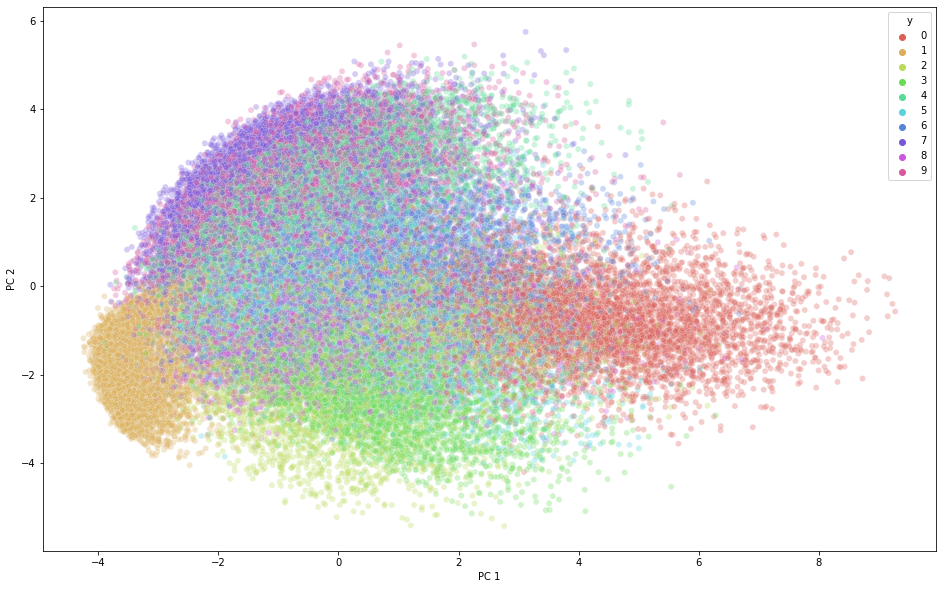

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC 1", y="PC 2",
    alpha=0.3,
    data=principal_mnist_Df,
    hue="y",
    legend="full",
    palette=sns.color_palette("hls", 10),
)


# Load Fashion-MNIST Data

In [2]:
(training_data,training_labels),(testing_data,testing_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(training_data.shape,training_labels.shape,testing_data.shape,testing_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


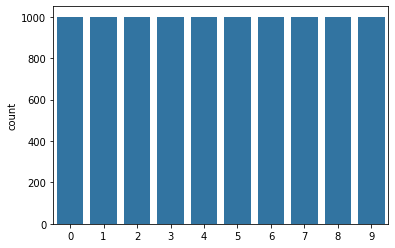

In [4]:
sns.countplot(testing_labels, color = sns.color_palette()[0])

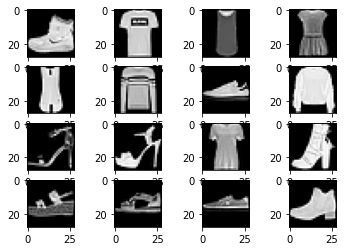

In [5]:
fig, axs = plt.subplots(4, 4)
for i in range(16):  
    r, c = i//4, i%4
    axs[r,c].imshow(training_data[i], cmap=plt.get_cmap('gray'))
plt.show()

Finding the classes in the dataset

In [6]:
classes = np.unique(training_labels)
nclasses = len(classes)

print('The', nclasses, 'classes are:', list(classes))

The 10 classes are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
# Check min and max
print(np.min(training_data), np.max(training_data))
print(np.min(testing_data), np.max(testing_data))

0 255
0 255


In [8]:
# Normalize the data
training_data = training_data.astype('float32') /255.0
testing_data = testing_data.astype('float32') / 255.0

## Creating a dataframe from the data

In [9]:
training_data_flat = training_data.reshape(-1,784)
features = ['pixel'+str(i) for i in range(training_data_flat.shape[1])]
df_fashion_mnist = pd.DataFrame(training_data_flat,columns=features)


In [11]:
df_fashion_mnist['label'] = training_labels
print('Size of the dataframe:',df_fashion_mnist.shape)

Size of the dataframe: (60000, 785)


In [12]:
df_fashion_mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


## Execute Principal Component Analysis

In [14]:
pca_fashion_mnist = PCA(n_components=2)
comps_fashion_mnist = pca_fashion_mnist.fit_transform(df_fashion_mnist.iloc[:,:-1])

In [15]:
principal_fashion_mnist_Df = pd.DataFrame(data = comps_fashion_mnist, columns = ['PC 1', 'PC 2'])
principal_fashion_mnist_Df['y'] = training_labels

In [16]:
principal_fashion_mnist_Df.head()

,PC 1,PC 2,y
0,-0.486668,6.404083,9
1,5.520849,-1.771197,0
2,-2.847141,-4.321025,0
3,0.122700,-3.847415,3
4,3.152977,-4.710560,0


In [17]:
print('Amount of variance explained for each principal component:\n', pca_fashion_mnist.explained_variance_ratio_)

Amount of variance explained for each principal component:
 [0.29039446 0.17755446]


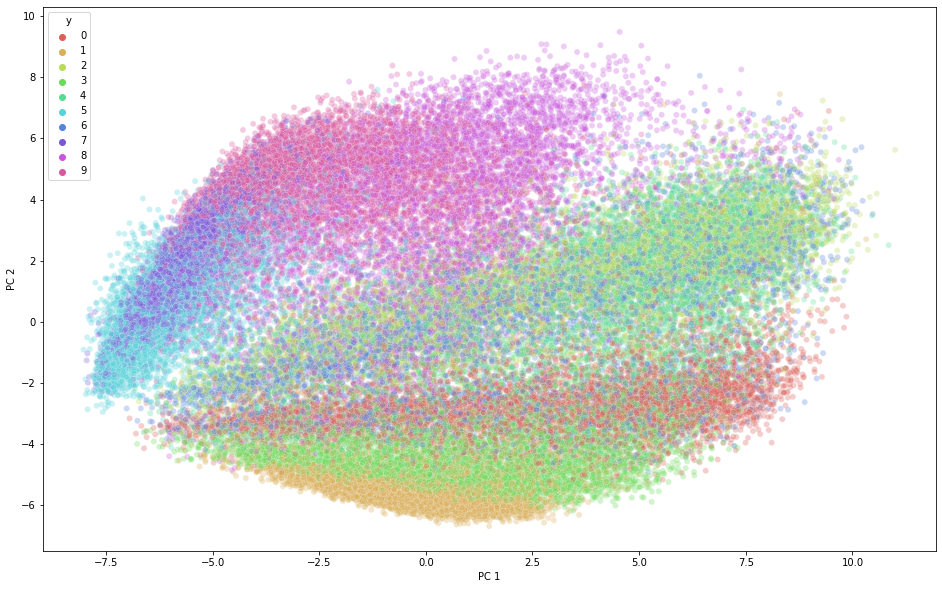

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC 1", y="PC 2",
    alpha=0.3,
    data=principal_fashion_mnist_Df,
    hue="y",
    legend="full",
    palette=sns.color_palette("hls", 10),
)


# Load CIFAR100 Data

In [19]:
(training_data,training_labels),(testing_data,testing_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [20]:
print(training_data.shape,training_labels.shape,testing_data.shape,testing_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Re-shape labels arrays

In [22]:
training_labels = training_labels.squeeze()
testing_labels = testing_labels.squeeze()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


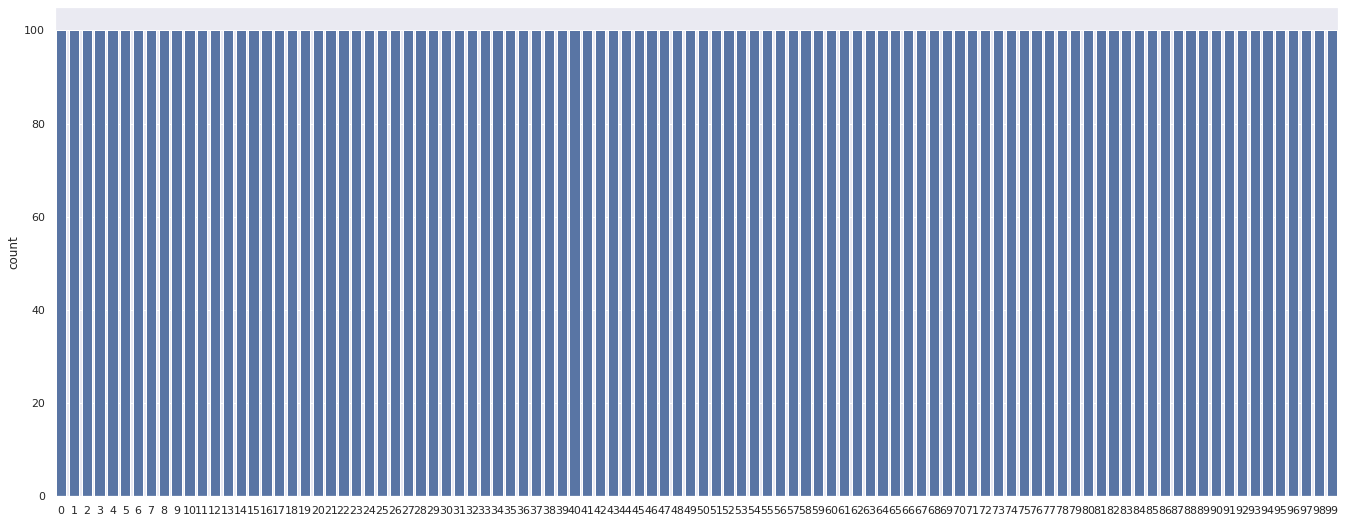

In [28]:
sns.set(rc={'figure.figsize':(23,9)})
sns.countplot(testing_labels, color = sns.color_palette()[0])

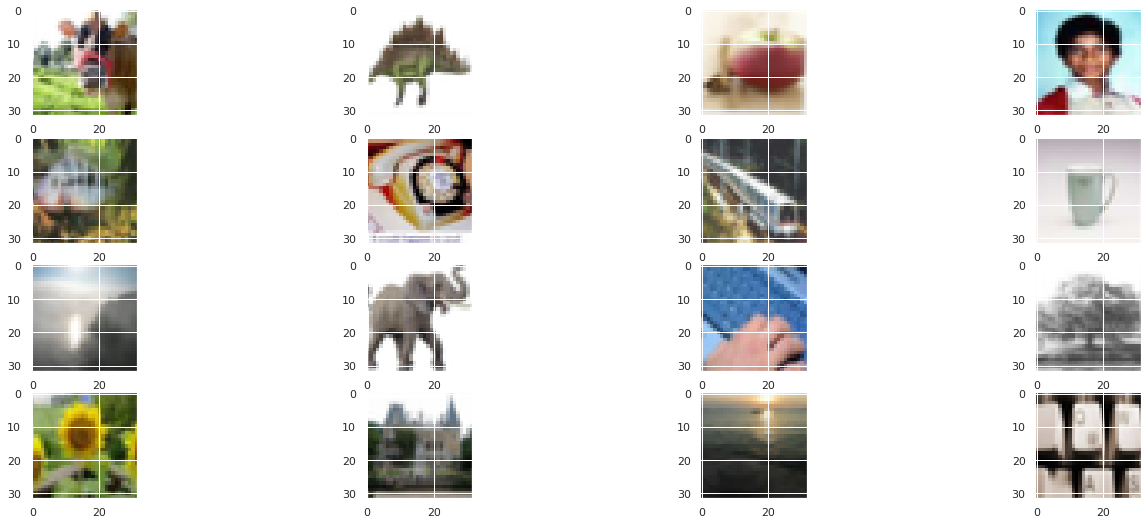

In [29]:
fig, axs = plt.subplots(4, 4)
for i in range(16):  
    r, c = i//4, i%4
    axs[r,c].imshow(training_data[i], cmap=plt.get_cmap('gray'))
plt.show()

Finding the classes in the dataset

In [30]:
classes = np.unique(training_labels)
nclasses = len(classes)

print('The', nclasses, 'classes are:', list(classes))

The 100 classes are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [31]:
# Check min and max
print(np.min(training_data), np.max(training_data))
print(np.min(testing_data), np.max(testing_data))

0 255
0 255


In [32]:
# Normalize the data
training_data = training_data.astype('float32') /255.0
testing_data = testing_data.astype('float32') / 255.0

## Creating a datadrame from the data

In [34]:
training_data_flat = training_data.reshape(-1,3072)
features = ['pixel'+str(i) for i in range(training_data_flat.shape[1])]
df_cifar100 = pd.DataFrame(training_data_flat,columns=features)


In [35]:
df_cifar100['label'] = training_labels
print('Size of the dataframe:',df_cifar100.shape)

Size of the dataframe: (50000, 3073)


In [36]:
df_cifar100.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.133333,0.141176,0.039216,0.411765,0.521569,0.231373,0.541176,0.678431,0.309804,19
1,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,1.000000,1.000000,1.000000,29
2,0.980392,0.980392,0.972549,0.972549,0.976471,0.952941,0.968627,0.972549,0.937255,0.972549,...,0.858824,0.819608,0.760784,0.874510,0.847059,0.811765,0.909804,0.901961,0.894118,0
3,0.486275,0.760784,0.866667,0.513726,0.792157,0.894118,0.529412,0.807843,0.894118,0.541176,...,0.901961,0.929412,0.909804,0.952941,0.929412,0.925490,0.952941,0.901961,0.905882,11
4,0.168627,0.192157,0.180392,0.125490,0.156863,0.133333,0.341176,0.349020,0.184314,0.498039,...,0.364706,0.345098,0.235294,0.215686,0.215686,0.113725,0.247059,0.262745,0.145098,1


Execute Principal Component Analysis

In [37]:
pca_cifar100 = PCA(n_components=2)
comps_cifar100 = pca_cifar100.fit_transform(df_cifar100.iloc[:,:-1])

In [38]:
principal_cifar100_Df = pd.DataFrame(data = comps_cifar100, columns = ['PC 1', 'PC 2'])
principal_cifar100_Df['y'] = training_labels

In [39]:
principal_cifar100_Df.head()

,PC 1,PC 2,y
0,4.256383,-3.970528,19
1,18.912231,2.751573,29
2,12.053185,-5.700082,0
3,8.888659,4.344597,11
4,-5.656666,0.831162,1


In [40]:
print('Amount of variance explained for each principal component:\n', pca_cifar100.explained_variance_ratio_)

Amount of variance explained for each principal component:
 [0.3349152 0.0936841]


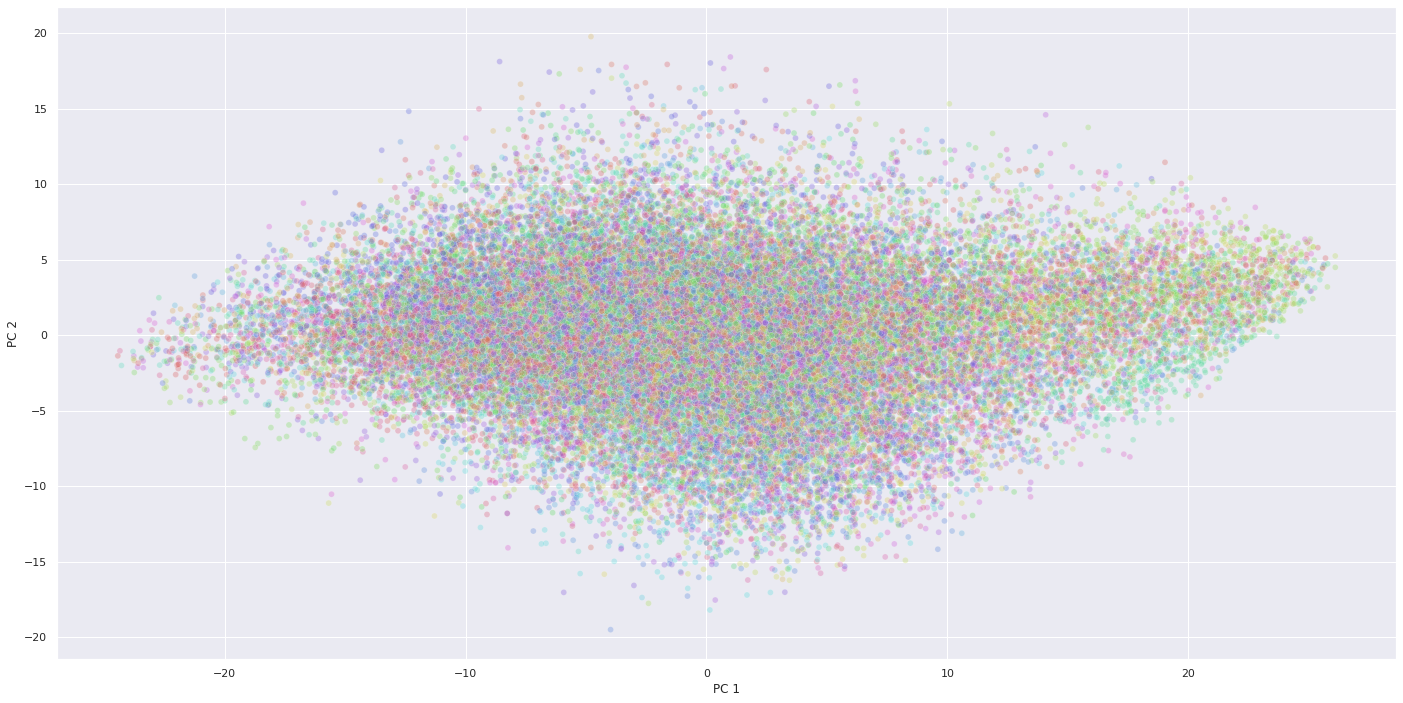

In [46]:
plt.figure(figsize=(24,12))
sns.scatterplot(
    x="PC 1", y="PC 2",
    alpha=0.3,
    data=principal_cifar100_Df,
    hue="y",
    legend=False,
    palette=sns.color_palette("hls", 100),
)